<a href="https://colab.research.google.com/github/sojod-talaat/Coursera_Data_Analysis-/blob/main/Coursare_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**


This project focuses on analyzing a dataset of online courses from Coursera,
one of the largest e-learning platforms in the world.
The dataset contains various details about the courses,
such as title, subject, price,
number of students enrolled, course level, ratings, and launch date.



The main objective of this analysis is to:

*   Explore trends in online education.
*  Identify the most popular subjects and skills.
* Compare free and paid courses in terms of engagement.
* Understand how course attributes (price, level, rating) influence enrollment.


By the end of this project, we aim to provide **data-driven insights** that could help educational platforms, instructors, and learners make better decisions.



# **Data Exploration**

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Load the dataset into a pandas DataFrame


In [31]:
df=pd.read_csv('/content/Coursera.csv')

Display the first 3 rows of the dataset to get a preview


In [32]:
display(df.head(3))

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...


Display the last 3 rows to see the end of the dataset


In [33]:
df.tail(3)

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,�Megatrends� heavily influence today�s organis...,analytics tableau software Business Intellig...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...
3521,Architecting with Google Kubernetes Engine: Pr...,Google Cloud,Intermediate,4.7,https://www.coursera.org/learn/deploying-secur...,"In this course, ""Architecting with Google Kube...",bigtable bigquery SQL Google Cloud Platform...


Show general information about the dataset: number of rows, columns, data types, and memory usage


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


Get a quick summary of the numerical columns (count, mean, std, min, 25%, 50%, 75%, max)


---



In [49]:
df.describe()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
count,3522,3522,3522,3522,3522,3522,3522
unique,3416,184,5,31,3424,3397,3424
top,Google Cloud Platform Fundamentals: Core Infra...,Coursera Project Network,Beginner,4.7,https://www.coursera.org/learn/gcp-fundamentals,This course introduces you to important concep...,Google Cloud Platform Big Data Cloud Infrast...
freq,8,562,1444,740,8,8,8


Summary statistics for all columns including categorical data

In [48]:
df.describe(include='all')

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
count,3522,3522,3522,3522,3522,3522,3522
unique,3416,184,5,31,3424,3397,3424
top,Google Cloud Platform Fundamentals: Core Infra...,Coursera Project Network,Beginner,4.7,https://www.coursera.org/learn/gcp-fundamentals,This course introduces you to important concep...,Google Cloud Platform Big Data Cloud Infrast...
freq,8,562,1444,740,8,8,8


Check for missing values in each column


In [37]:
print(df.isnull().sum())

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64


Check for duplicate rows in the dataset

In [38]:
print(df.duplicated().sum())

98


Display the shape of the dataset (rows, columns)

In [39]:

print(f"\nDataset shape: ")
df.shape


Dataset shape: 


(3522, 7)

List all column names to understand available features


In [40]:
df.columns.to_list()

['Course Name',
 'University',
 'Difficulty Level',
 'Course Rating',
 'Course URL',
 'Course Description',
 'Skills']

Get unique values count for each column (to understand categorical variables)


In [41]:
df.nunique()

,0
Course Name,3416
University,184
Difficulty Level,5
Course Rating,31
Course URL,3424
Course Description,3397
Skills,3424


Get the correlation matrix between numerical features (to see relationships)


In [51]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()

""


# Data Cleaning

In [55]:
df = df.drop_duplicates()

In [56]:
df.shape

(3424, 7)

Convert 'Course Rating' column from object (string) to numeric (float)
This allows us to perform numerical analysis on course ratings



In [99]:
df['Course Rating'] = pd.to_numeric(df['Course Rating'], errors='coerce')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3424 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Course Name         3424 non-null   object 
 1   University          3424 non-null   object 
 2   Difficulty Level    3424 non-null   object 
 3   Course Rating       3342 non-null   float64
 4   Course URL          3424 non-null   object 
 5   Course Description  3424 non-null   object 
 6   Skills              3424 non-null   object 
dtypes: float64(1), object(6)
memory usage: 214.0+ KB


 List of text columns to clean

In [100]:
text_columns = ['Course Name', 'University', 'Difficulty Level', 'Course Description', 'Skills']

for col in text_columns:
    if col in df.columns:
        # Remove leading and trailing whitespace from text
        df[col] = df[col].str.strip()

        # Convert text to Title Case (capitalize first letter of each word)
        df[col] = df[col].str.title()

        # If you want to convert text to lowercase instead of Title Case, replace the previous line with:
        # df_clean[col] = df_clean[col].str.lower()

# Display sample after cleaning to verify
display(df[text_columns].head())


,Course Name,University,Difficulty Level,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,Write A Full Length Feature Film Script In Th...,Drama Comedy Peering Screenwriting Film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,"By The End Of This Guided Project, You Will Be...",Finance Business Plan Persona (User Experien...
2,Silicon Thin Film Solar Cells,�Cole Polytechnique,Advanced,This Course Consists Of A General Presentation...,Chemistry Physics Solar Energy Film Lambda...
3,Finance For Managers,Iese Business School,Intermediate,"When It Comes To Numbers, There Is Always More...",Accounts Receivable Dupont Analysis Analysis...
4,Retrieve Data Using Single-Table Sql Queries,Coursera Project Network,Beginner,In This Course You�Ll Learn How To Effectively...,Data Analysis Select (Sql) Database Manageme...


# Statistical analysis (EDA)

Count the number of courses in each Difficulty Level category


In [60]:
difficulty_counts = df['Difficulty Level'].value_counts()

print("Number of courses by Difficulty Level:")
print(difficulty_counts)

Number of courses by Difficulty Level:
Difficulty Level
Beginner          1406
Advanced           991
Intermediate       823
Conversant         154
Not Calibrated      50
Name: count, dtype: int64


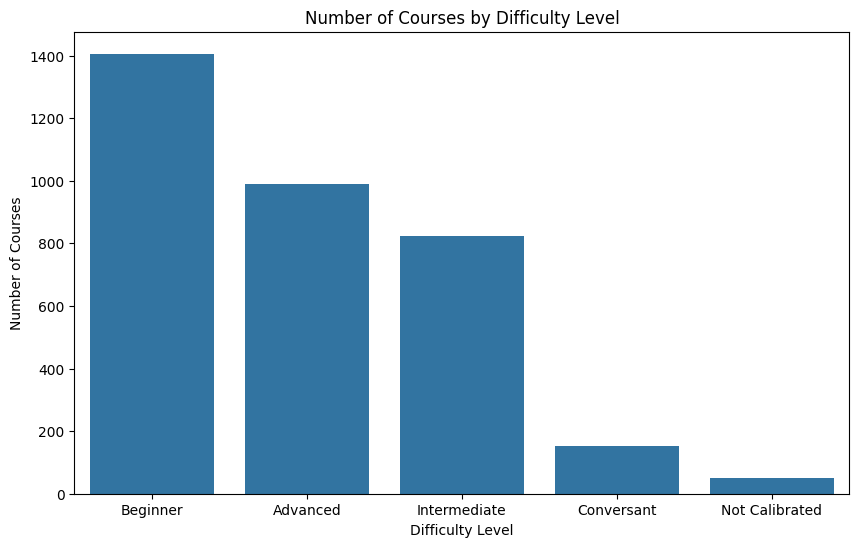

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x=difficulty_counts.index, y=difficulty_counts.values)
plt.xlabel('Difficulty Level')
plt.ylabel('Number of Courses')
plt.title('Number of Courses by Difficulty Level')
plt.show()

Overall average course rating

In [62]:
overall_avg_rating=df['Course Rating'].mean()
print(f"Overall average course rating: {overall_avg_rating:.2f}")

Overall average course rating: 4.55


Average course rating by Difficulty Level

In [66]:
avg_coursr_rating_by_difficulty=df.groupby('Difficulty Level')['Course Rating'].mean()
print("Average course rating by Difficulty Level:")
print(avg_coursr_rating_by_difficulty)

Average course rating by Difficulty Level:
Difficulty Level
Advanced          4.460838
Beginner          4.591781
Conversant        4.595105
Intermediate      4.583189
Not Calibrated    4.579167
Name: Course Rating, dtype: float64


In [73]:
avg_coursr_rating_by_difficulty=avg_coursr_rating_by_difficulty.sort_values(ascending=False)

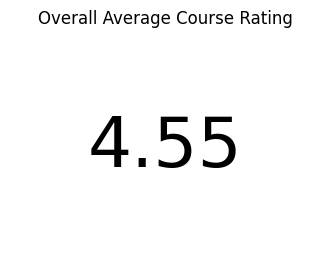

In [69]:
plt.figure(figsize=(4,3))
plt.text(0.5, 0.5, f"{overall_avg_rating:.2f}", fontsize=50, ha='center', va='center')
plt.title('Overall Average Course Rating')
plt.axis('off')  # يخفي المحاور
plt.show()


/tmp/ipython-input-81921479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_coursr_rating_by_difficulty.index,


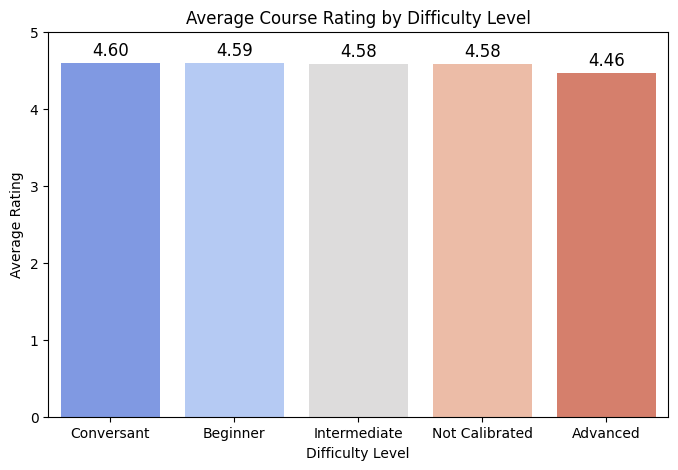

In [76]:
plt.figure(figsize=(8,5))
sns.barplot(x=avg_coursr_rating_by_difficulty.index,
            y=avg_coursr_rating_by_difficulty.values,
            palette='coolwarm')

plt.title('Average Course Rating by Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
for index, value in enumerate(avg_coursr_rating_by_difficulty.values):
    plt.text(index, value + 0.05, f"{value:.2f}", ha='center', va='bottom', fontsize=12)
plt.show()


/tmp/ipython-input-3315393393.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Difficulty Level', y='Course Rating', data=df, palette='Set2')


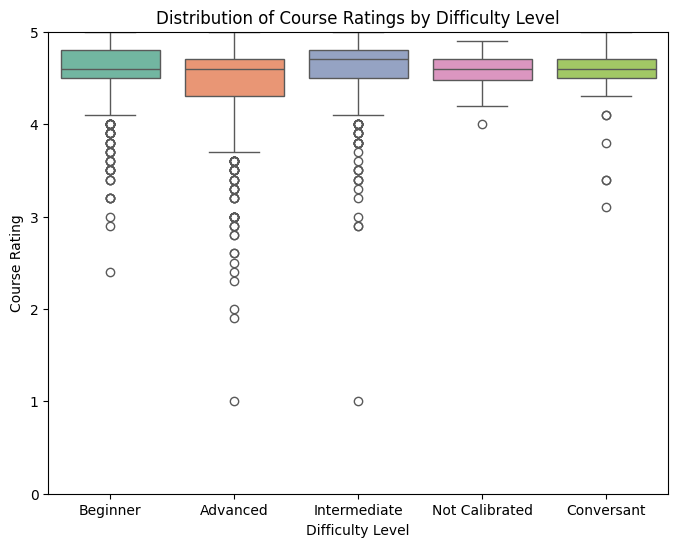

In [84]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Difficulty Level', y='Course Rating', data=df, palette='Set2')
plt.title('Distribution of Course Ratings by Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Course Rating')
plt.ylim(0, 5)
plt.show()


Top In-Demand Skills Across Coursera Courses:

In [81]:
# 1. Concatenate all text in the 'Skills' column into one large string
all_skills = df['Skills'].dropna().str.cat(sep=', ')

# 2. Split the string by commas and convert into a list of individual skills
skill_list = [skill.strip() for skill in all_skills.split(',')]

# 3. Count the frequency of each skill using pandas Series value_counts()
skills_series = pd.Series(skill_list)
skill_counts = skills_series.value_counts()

# 4. Display the top 10 most common skills
print("Top 5 most common skills:")
print(skill_counts.head(5))


Top 5 most common skills:
Euler'S Totient Function  Computer Programming  Closure (Computer Programming)  Bounded Quantification  Functional Programming  Subtyping  Language  Type System  Ruby (Programming Language)  Ordered Pair Computer-Science Software-Development    1
Public Domain  Trademarks  Intellectual Property Law  Intellectual Property  Interpolation  Process  Law  Entertainment Law  Sound  Music Business Business-Strategy                                                                                 1
Dimensionality Reduction  Regression Analysis  Modeling  Univariate  Dependent And Independent Variables  Regression  General Statistics  Curse Of Dimensionality  Analytics  Univariate Analysis Business Leadership-And-Management                 1
I-Deas  Project  Digital Signature  Writing  Do The Work  Innovation  Composite Artifact Colors  Euler'S Totient Function  Wordpress  Microsoft Excel Social-Sciences Education                                                          

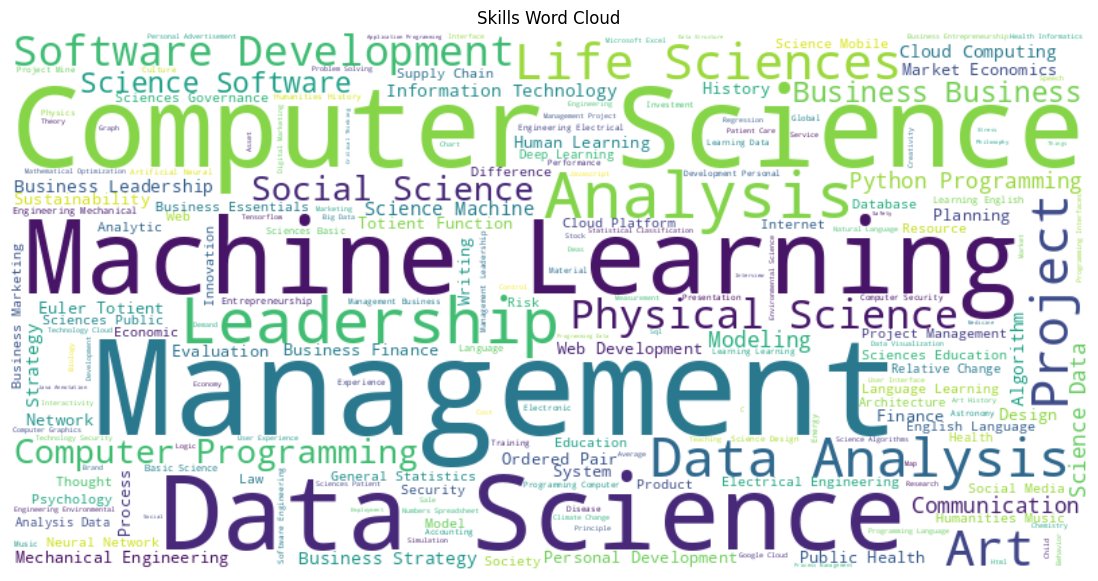

In [82]:
from wordcloud import WordCloud

# إنشاء نص من المهارات مع تكرارها
skills_text = ' '.join(skill_list)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills_text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Skills Word Cloud')
plt.show()


Number of Courses by University



In [85]:

university_counts = df['University'].value_counts()
print("Top 10 Universities by Number of Courses:")
print(university_counts.head(10))

Top 10 Universities by Number of Courses:
University
Coursera Project Network                      562
University Of Illinois At Urbana-Champaign    138
University Of Colorado Boulder                101
Johns Hopkins University                      101
University Of Michigan                        101
University Of California, Irvine               83
University Of Colorado System                  81
University Of California San Diego             79
Google Cloud                                   70
Ibm                                            54
Name: count, dtype: int64


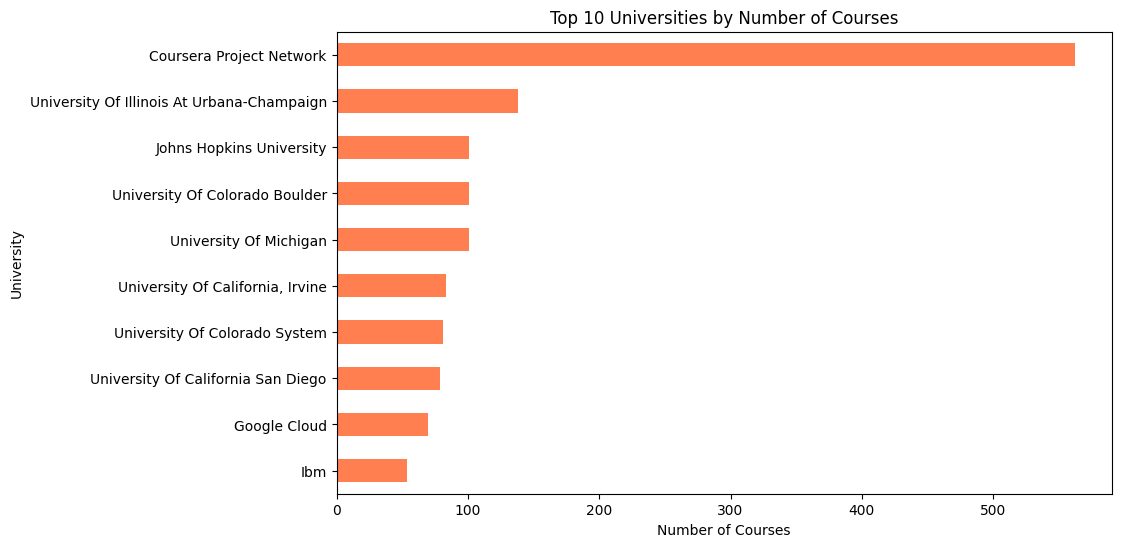

In [86]:
plt.figure(figsize=(10,6))
university_counts.head(10).sort_values().plot(kind='barh', color='coral')
plt.title('Top 10 Universities by Number of Courses')
plt.xlabel('Number of Courses')
plt.ylabel('University')
plt.show()

Average Course Rating by University



Top 10 Universities by Average Course Rating (min 5 courses):
                                    Course Count  Average Rating
University                                                      
Curtis Institute Of Music                      6        4.883333
Sas                                           18        4.813333
Yale University                               29        4.782759
Eindhoven University Of Technology             5        4.760000
Autodesk                                      22        4.754545
The Museum Of Modern Art                       6        4.750000
Mcmaster University                            9        4.722222
University Of Cape Town                       19        4.715789
Arizona State University                      22        4.700000
The University Of Chicago                      5        4.700000


/tmp/ipython-input-1225294355.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=univ_stats_sorted.head(10).index, y=univ_stats_sorted.head(10)['Average Rating'], palette='magma')


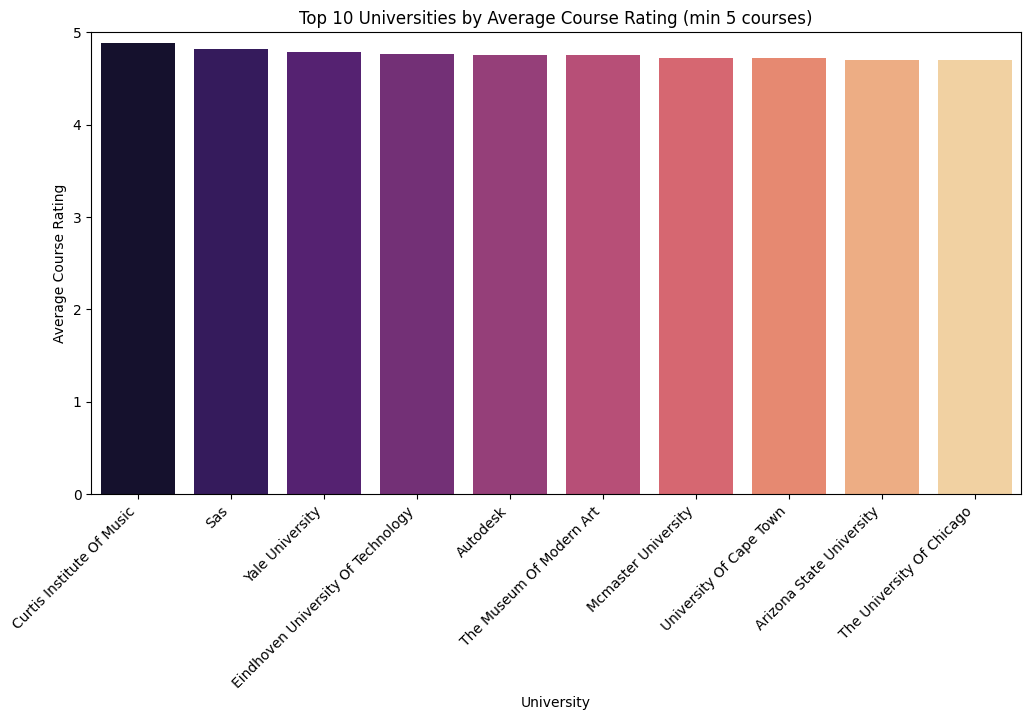

In [90]:
# Calculate the number of courses offered by each university
course_counts = df['University'].value_counts()

# Calculate the average course rating for each university
avg_rating_by_university = df.groupby('University')['Course Rating'].mean()

# Combine the course counts and average ratings into a single DataFrame
univ_stats = pd.DataFrame({
    'Course Count': course_counts,
    'Average Rating': avg_rating_by_university
})

# Filter universities with 5 or more courses to ensure reliable ratings
univ_stats_filtered = univ_stats[univ_stats['Course Count'] >= 5]

# Sort universities by average rating in descending order
univ_stats_sorted = univ_stats_filtered.sort_values(by='Average Rating', ascending=False)

# Display the top 10 universities based on average course rating
print("Top 10 Universities by Average Course Rating (min 5 courses):")
print(univ_stats_sorted.head(10))

# Plot a bar chart of the top 10 universities by average course rating
plt.figure(figsize=(12,6))
sns.barplot(x=univ_stats_sorted.head(10).index, y=univ_stats_sorted.head(10)['Average Rating'], palette='magma')

plt.title('Top 10 Universities by Average Course Rating (min 5 courses)')
plt.xlabel('University')
plt.ylabel('Average Course Rating')
plt.ylim(0, 5)
plt.xticks(rotation=45, ha='right')
plt.show()


Average course description length by Difficulty Level:
Difficulty Level
Advanced          177.011100
Beginner          174.964438
Conversant        176.857143
Intermediate      189.098420
Not Calibrated    155.460000
Name: Description Length, dtype: float64


/tmp/ipython-input-746010342.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_desc_length.index, y=avg_desc_length.values, palette='coolwarm')


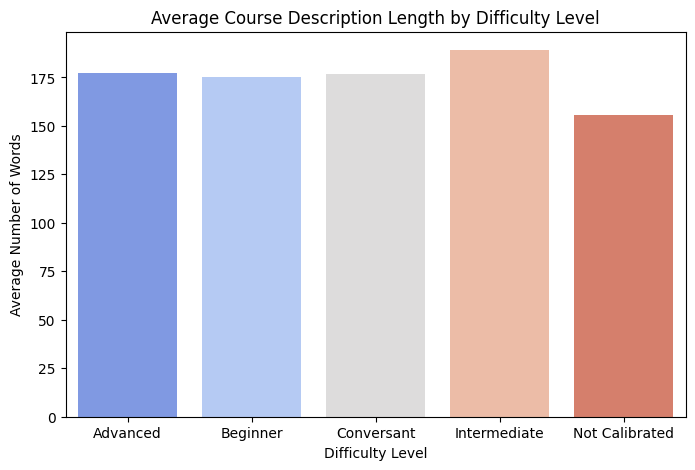

In [92]:
# Calculate the number of words in each course description
df['Description Length'] = df['Course Description'].apply(lambda x: len(str(x).split()))

# Calculate the average description length by difficulty level
avg_desc_length = df.groupby('Difficulty Level')['Description Length'].mean()

print("Average course description length by Difficulty Level:")
print(avg_desc_length)

# Plot a bar chart for average course description length by difficulty level
plt.figure(figsize=(8,5))
sns.barplot(x=avg_desc_length.index, y=avg_desc_length.values, palette='coolwarm')
plt.title('Average Course Description Length by Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Average Number of Words')
plt.show()


Analyze Course Content — Using TF-IDF to find important words in Course Descriptions


In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Prepare the corpus: course descriptions (cleaned)
corpus = df['Course Description'].fillna('').tolist()

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=50)

# Fit and transform the corpus
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Get the average TF-IDF score for each word
avg_tfidf = tfidf_matrix.mean(axis=0).A1

# Create a DataFrame for words and their scores
tfidf_df = pd.DataFrame({'word': feature_names, 'avg_tfidf': avg_tfidf})

# Sort words by importance
tfidf_df = tfidf_df.sort_values(by='avg_tfidf', ascending=False)

print("Top 20 important words in course descriptions:")
print(tfidf_df.head(20))


Top 20 important words in course descriptions:
             word  avg_tfidf
10         course   0.221409
12           data   0.104633
23          learn   0.102184
33        project   0.084699
25       learning   0.070722
44            use   0.070336
26             ll   0.066359
7        business   0.065597
3           based   0.065012
46          using   0.061042
13         design   0.055959
24       learners   0.054297
49          world   0.053908
0            able   0.053745
38       students   0.053651
11         create   0.052146
35         skills   0.052015
4           basic   0.049601
17     experience   0.049358
42  understanding   0.048159


University vs Coursera Project Network Comparison



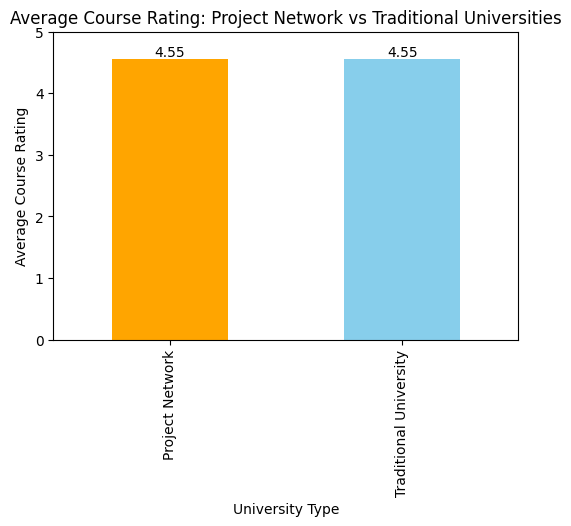

In [96]:
plt.figure(figsize=(6,4))
ax = avg_rating_by_type.plot(kind='bar', color=['orange', 'skyblue'])

plt.title('Average Course Rating: Project Network vs Traditional Universities')
plt.ylabel('Average Course Rating')
plt.ylim(0,5)

# إضافة الأرقام فوق الأعمدة
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.show()


# Summary



This analysis of Coursera courses provided valuable insights into the platform’s course offerings, skill trends, and institutional performance. The dataset shows a strong presence of beginner-level courses, which dominate in quantity, while intermediate and advanced courses tend to receive higher average ratings, indicating learners’ appreciation for more challenging and specialized content. Popular skills such as Python, Machine Learning, and Data Analysis are widely taught, reflecting current industry demands.

Additionally, universities vary considerably in both the number of courses they offer and the quality of those courses as reflected in average ratings. Notably, filtering universities with at least five courses provides a more reliable comparison, revealing institutions that consistently maintain high standards. The Coursera Project Network courses also display distinct rating patterns compared to traditional universities, suggesting different approaches and learner preferences.

Finally, the length of course descriptions correlates with course difficulty, with advanced courses featuring longer, more detailed descriptions that likely cater to more in-depth learning needs. These findings can help learners choose the right courses and guide educators in creating content that meets learner expectations.


# Key Takeaways




1. Beginner courses constitute the majority of courses on Coursera.

2. Intermediate and advanced courses generally have higher average ratings.

3. Python, Machine Learning, and Data Analysis are the most common skills taught.

4. Universities differ significantly in course counts and average ratings.

5. Filtering for universities with 5+ courses offers a clearer view of quality.

6. Coursera Project Network courses have different rating trends compared to traditional universities.

7. Advanced courses have longer descriptions, indicating more detailed content.



